## Classification

Modified from coursera/machine learning with python

### Load necessary libraries

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics

### Load dataset
Using the IRIS dataset as example

In [2]:
classification_dir = "Data/Classification/IRIS/"
df = pd.read_csv(classification_dir + 'IRIS.csv')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Exploratory Data Analysis

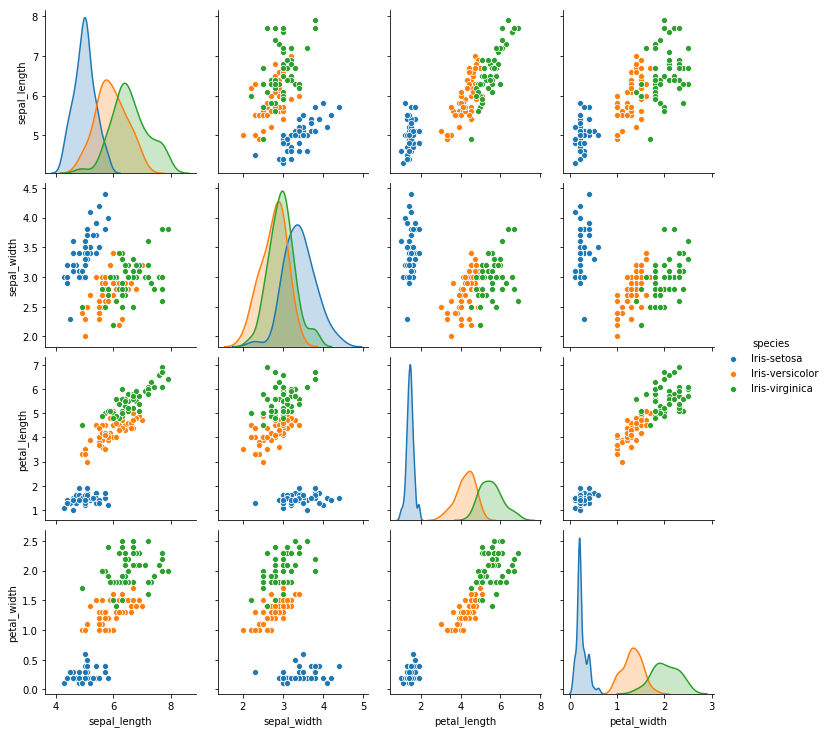

In [10]:
# correlation of columns
sns.pairplot(df, vars=df.columns[:-1], hue="species")
plt.show()


### Preprocessing

Split the train and test set

In [6]:
train, test = train_test_split(df)
print(f"Training set contains {train.shape[0]} records")
print(f"Test set contains {test.shape[0]} records")
X_train = train.drop('species', axis=1)
y_train = train['species']
X_test = test.drop('species', axis=1)
y_test = test['species']


Training set contains 112 records
Test set contains 38 records


### K nearest neighbor (KNN)

In [8]:
# start with k=4 neighbors
k = 4

neigh = KNeighborsClassifier(n_neighbors=4)
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

#### evaluation

In [9]:
y_pred = neigh.predict(X_test)

print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Train set Accuracy:  0.9732142857142857
Test set Accuracy:  0.8947368421052632


#### calculate the accuracy of KNN for different k

In [11]:
Ks = 10
mean_acc = np.zeros((Ks-1))
for n in range(1,Ks):

    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

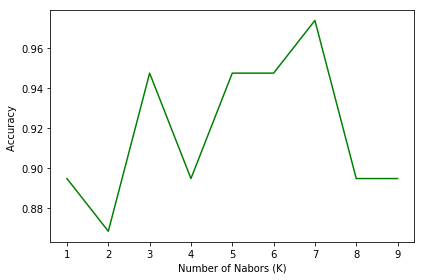

In [12]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

The prediction accuracy is highest with k = 7


### Decision Trees

In [19]:
tree = DecisionTreeClassifier(criterion="entropy")
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#### evaluation

In [20]:
y_pred_tree = tree.predict(X_test)
print("Decision Tree's accuracy: ", metrics.accuracy_score(y_test, y_pred_tree))

Decision Tree's accuracy:  0.8947368421052632


In [29]:
print(metrics.classification_report(y_test, y_pred_tree))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.83      0.94      0.88        16
 Iris-virginica       0.91      0.77      0.83        13

       accuracy                           0.89        38
      macro avg       0.91      0.90      0.91        38
   weighted avg       0.90      0.89      0.89        38



#### calculate the accuracy of decision tree for different depth

In [23]:
Md = 5
mean_acc_tree = np.zeros((Ks-1))
for n in range(1,Md):

    #Train Model and Predict
    tree = DecisionTreeClassifier(criterion="entropy", max_depth=n)
    tree.fit(X_train, y_train)
    yhat=tree.predict(X_test)
    mean_acc_tree[n-1] = metrics.accuracy_score(y_test, yhat)

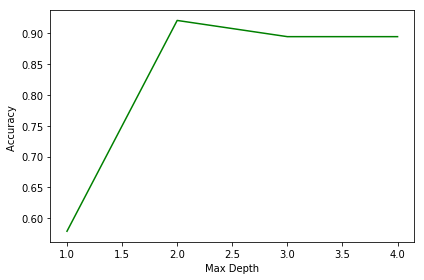

In [24]:
plt.plot(range(1,Md),mean_acc_tree,'g')
plt.ylabel('Accuracy ')
plt.xlabel('Max Depth')
plt.tight_layout()
plt.show()

The prediction accuracy is highest with max_depth = 2

### Logistic Regression

In [26]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)


#### evaluation

In [27]:
y_pred_lr = LR.predict(X_test)
print("LogisticRegression's accuracy: ", metrics.accuracy_score(y_test, y_pred_lr))

LogisticRegression's accuracy:  0.5789473684210527


In [28]:
print(metrics.classification_report(y_test, y_pred_lr))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.00      0.00      0.00        16
 Iris-virginica       0.45      1.00      0.62        13

       accuracy                           0.58        38
      macro avg       0.48      0.67      0.54        38
   weighted avg       0.39      0.58      0.45        38



c:\users\wangj\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Support Vector Machine

In [33]:
# available kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

In [34]:
mean_acc_svm = []
f1_svm = []
for k in kernels:
    clf = svm.SVC(kernel = k)
    clf.fit(X_train, y_train)
    yhat = clf.predict(X_test)
    mean_acc_svm.append(metrics.accuracy_score(y_test, yhat))
    f1_svm.append(metrics.f1_score(y_test, yhat, average='weighted'))

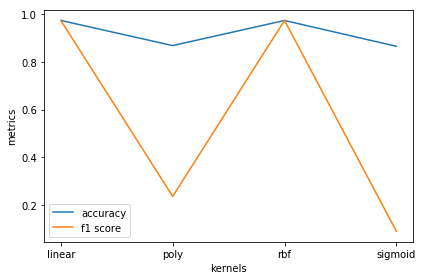

In [39]:
result = np.stack([mean_acc_svm, f1_svm]).reshape((4,2))
plt.plot(kernels,result)
plt.ylabel('metrics')
plt.xlabel('kernels')
plt.legend(['accuracy', 'f1 score'])
plt.tight_layout()
plt.show()
